# Principal Component Analysis:A Classical Method for Dimension Reduction
applications: image processing,bioinformatics&quantitative finance

It uses first several principal components ,statistical features that explain most of the variation of a m X n data matrix,to describe large-scale data matrix X economically

In [41]:
import numpy as np

In [1]:
from numpy import linalg as LA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def  generate_test_image(m,n):
    X= np.zeros((m,n))
    X[25:80,25:80]=1
    for i in range (25,80,1):
        X[i+80:160,100+i-1]=2
    for i in range(0,200,1):
        for j in range(0,200,1):
            if ((i-135)*(i-135)+(j-53)*(j-53)<=900):
                X[i,j]=3
    return X
X=generate_test_image(200,200)

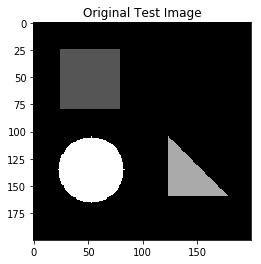

In [6]:
imgplot=plt.imshow(X,cmap='gray')
plt.title('Original Test Image');

In [7]:
m=X.shape[0]
n=X.shape[1]

In [12]:
print(m,n)

200 200


In [13]:
X=np.asarray(X,dtype=np.float64)
C=np.cov(X)

In [14]:
np.linalg.matrix_rank(C)

62

In [15]:
P,L=LA.eigh(C)

In [16]:
P=P[::-1]
L=L[:,::-1]

In [17]:
np.allclose(L.dot(np.diag(P)).dot(L.T),C)

True

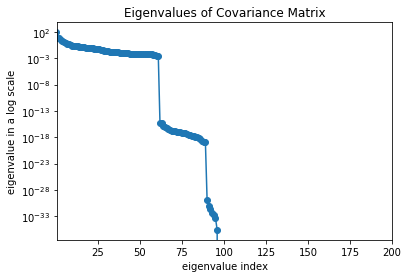

In [20]:
plt.semilogy(P,'-o')
plt.xlim([1,P.shape[0]])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue in a log scale')
plt.title('Eigenvalues of Covariance Matrix');

In [21]:
V=L.T.dot(X)

In [22]:
V.shape

(200, 200)

In [24]:
k=200
X_tilde=L[:,0:k-1].dot(L[:,0:k-1].T).dot(X)

In [25]:
np.allclose(X_tilde,X)

True

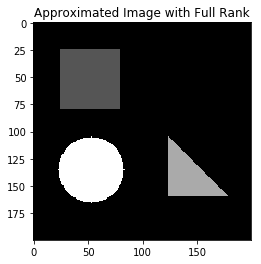

In [27]:
plt.imshow(X_tilde,cmap='gray')
plt.title('Approximated Image with Full Rank');

In [28]:
(P/P.sum()).sum()

0.99999999999999989

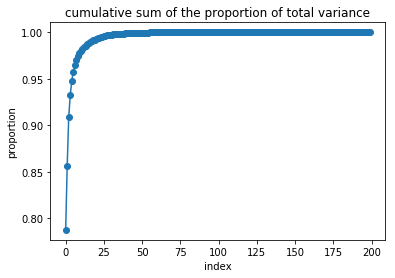

In [29]:
plt.plot((P/P.sum()).cumsum(),'-o')
plt.title('cumulative sum of the proportion of total variance')
plt.xlabel('index')
plt.ylabel('proportion');

In [31]:
X_tilde_10=L[:,0:10-1].dot(V[0:10-1,:])

In [32]:
X_tilde_20=L[:,0:20-1].dot(V[0:20-1,:])

In [39]:
X_tilde_30=L[:,0:30-1].dot(V[0:30-1,:])

In [37]:
X_tilde_60=L[:,0:60-1].dot(V[0:60-1,:])

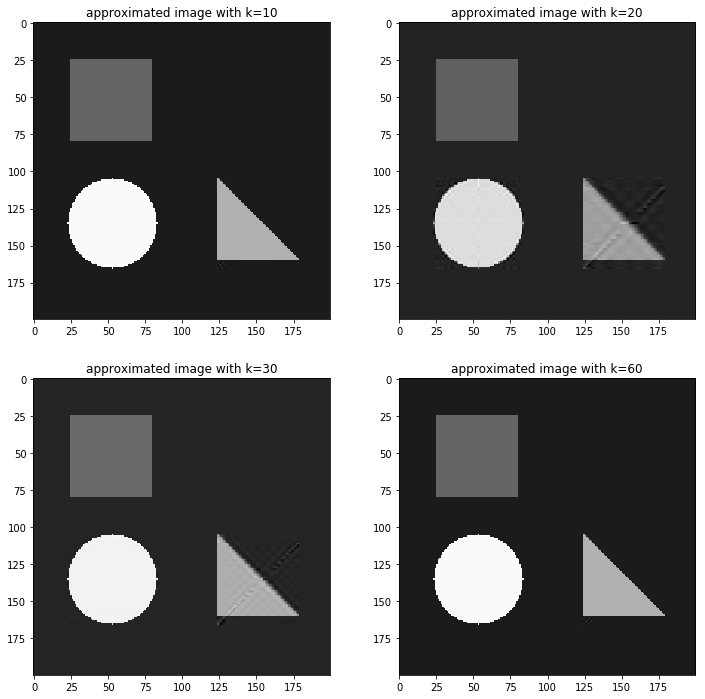

In [40]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12))
ax1.imshow(X_tilde_10,cmap='gray')
ax1.set(title='approximated image with k=10')
ax2.imshow(X_tilde_20,cmap='gray')
ax2.set(title='approximated image with k=20')
ax3.imshow(X_tilde_30,cmap='gray')
ax3.set(title='approximated image with k=30')
ax4.imshow(X_tilde_60,cmap='gray')
ax4.set(title='approximated image with k=60');